# Exercices

## Exercice ACP

In [27]:
# Pour Kévin

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition, preprocessing

data = pd.read_csv("billets.csv", sep=";")
display(data)
data = data.dropna()

standard_scaler = preprocessing.StandardScaler()

billets_data = standard_scaler.fit_transform(data[data.columns[1:]])

pca = decomposition.PCA()
billets_pca = pca.fit_transform(billets_data)

billetspca = pd.DataFrame(billets_pca, index=data.index, columns=["PC"+str(i+1) for i in range(6)])
billetspca

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


,PC1,PC2,PC3,PC4,PC5,PC6
0,1.627035,0.807294,2.192500,3.328620,0.328611,0.002057
1,-2.017133,-2.217975,-1.011861,0.043402,0.043670,-0.468112
2,-0.996369,2.596334,1.241833,-0.878880,-0.868951,0.184537
3,-1.379560,-1.809941,0.594839,0.890183,0.805023,-0.213295
4,0.138409,-0.597355,0.976431,-1.737647,1.147098,-0.295813
...,...,...,...,...,...,...
1495,1.415019,-0.260032,0.912233,0.600323,-0.236258,-1.315906
1496,3.261672,1.330325,0.601857,0.367258,-0.106580,-0.546738
1497,1.878843,-0.599267,-0.532782,-0.117704,-0.297130,0.497393
1498,1.775458,0.506379,0.067710,-0.483507,0.344075,0.523804


In [29]:
pca.explained_variance_ratio_

array([0.43123527, 0.16970651, 0.13136423, 0.11792169, 0.0962036 ,
       0.0535687 ])

In [8]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.12, 16.97, 13.14, 11.79,  9.62,  5.36])

In [10]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

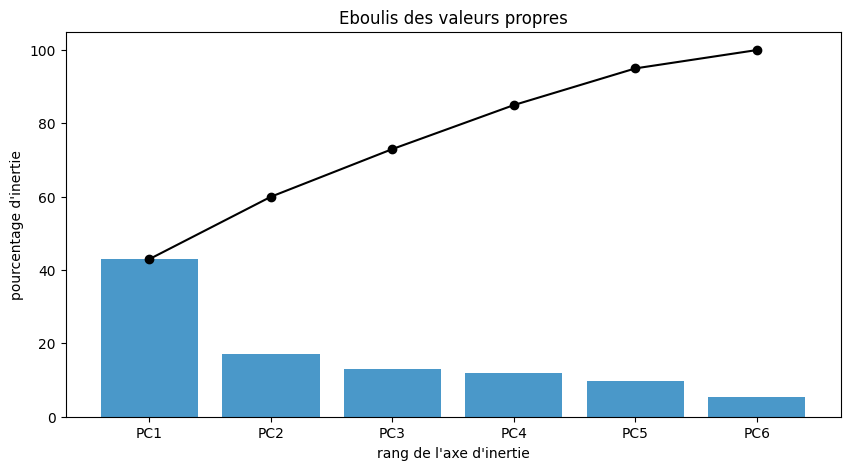

In [14]:
import matplotlib as cm

n_components = 6
x_list = ['PC'+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]


plt.figure(figsize = (10,5))
plt.bar(x_list, scree, color=plt.get_cmap('Blues')(0.6))
plt.plot(x_list, scree_cum,c="black",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [16]:
pca.components_.shape

(6, 6)

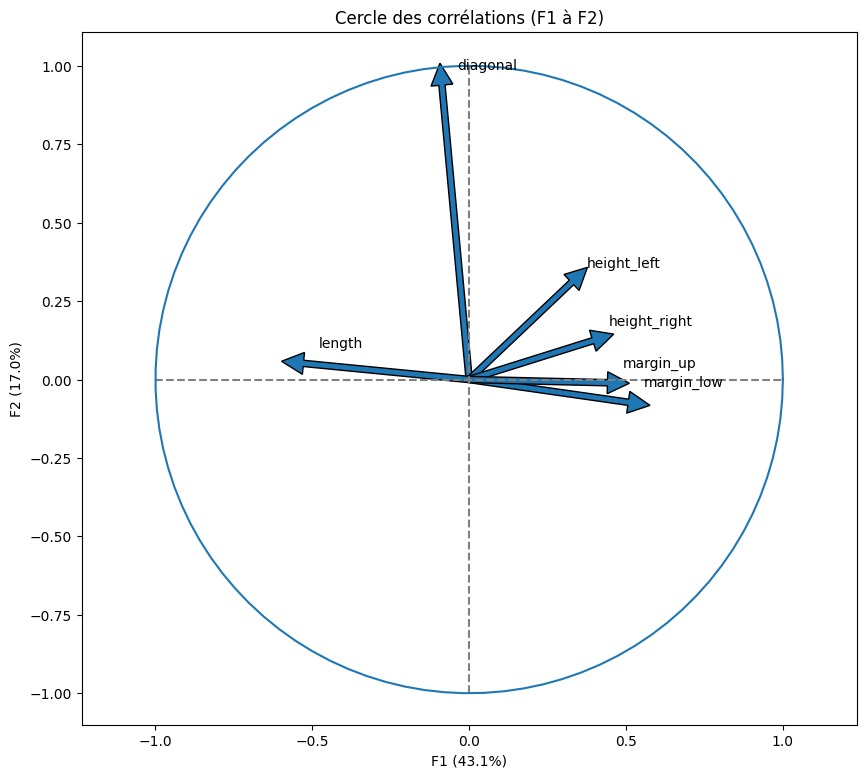

In [33]:
features = data[data.columns[1:]].columns
x, y = 0,1

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} à F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

## Exercice Pycaret

Vous allez à présent détecter de faux billets !

Vous aurez à disposition un jeu de données contenant différentes variables :

1. **is_genuine** : target, nous dit si le billet est un vrai billet ou non.
2. **toutes les autres variables sont des tailles exprimées en cm**

1. Préparation des données

*N'oubliez pas que Pycaret ne réalise pas toutes les étapes de nettoyage !*

In [34]:
import pandas as pd
data = pd.read_csv("billets.csv", sep=";")
data 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


2. Installez et Importez Pycaret 

3. Créez un environnement Pycaret

4. Comparez les modèles et sélectionnez le meilleur

5. Effectuez des prévisions sur vos données

6. Affichez le feature importance plot

## Exercice SVM, K-NearestNeighbors, Naïve-Bayes et les méthodes Stochastiques

Suite aux résultats obtenus grâce à Pycaret, essayez d'améliorer le score des SVM en modifiant certains paramètres.

In [35]:
from sklearn import svm

In [36]:
# Codez ici

Suite aux résultats obtenus grâce à Pycaret, essayez d'améliorer le score de K-NN en modifiant certains paramètres.

In [37]:
# Codez ici

Suite aux résultats obtenus grâce à Pycaret, essayez d'améliorer le score du modèle Naïve-Bayes en modifiant certains paramètres.

In [38]:
# Codez ici

Faites de même pour les méthodes Stochastiques.

In [39]:
# Codez ici